In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

оценка 2 и ниже — низкий рейтинг;

оценка 4 и ниже — средний рейтинг;

оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [20]:
def estimate_movies(row):
    if row['rating']<=2:
        row['class'] = 'низкий рейтинг'
    elif row['rating']<=4:
        row['class'] = 'средний рейтинг'
    elif row['rating']<=5:
        row['class'] = 'высокий рейтинг'
    else:
        row['class'] = ''
        
    return row

ratings = pd.read_csv('ratings.csv')
ratings_ = ratings.apply(estimate_movies, axis=1)
ratings_.head(7)

,userId,movieId,rating,timestamp,class
0,1.0,31.0,2.5,1.260759e+09,средний рейтинг
1,1.0,1029.0,3.0,1.260759e+09,средний рейтинг
2,1.0,1061.0,3.0,1.260759e+09,средний рейтинг
3,1.0,1129.0,2.0,1.260759e+09,низкий рейтинг
4,1.0,1172.0,4.0,1.260759e+09,средний рейтинг
5,1.0,1263.0,2.0,1.260759e+09,низкий рейтинг
6,1.0,1287.0,2.0,1.260759e+09,низкий рейтинг


Задание 2
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. 
Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [53]:
def set_region(row):
    row['region'] = 'udefined'
    for i in row['keyword'].split():
        if i in ['москва', 'тула', 'ярославль']:
            row['region'] = 'Центр'
        elif i in ['петербург', 'псков', 'мурманск']:
            row['region'] = 'Северо-Запад'
        elif i in ['владивосток', 'сахалин', 'хабаровск']:
            row['region'] = 'Дальний Восток'  
   
    return row

keywords = pd.read_csv('keywords.csv')
keywords_ = keywords.apply(set_region, axis=1)

Задание 3 (бонусное)

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010 года.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

для каждой строки пройдите по всем годам списка years;
если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [15]:
def get_year(row):
    years = list(range(1950, 2025))
    try:
        if int(row['title'].split('(')[-1][:-1]) in years:
            row['year'] = int(row['title'].split('(')[-1][:-1])
        else:
            row['year'] = 1900
    except:
        row['year'] = 1900
        
    return row

In [22]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
films = pd.merge(movies.apply(get_year, axis=1), ratings, on = 'movieId', how = 'inner')
films_ = films.groupby('year', as_index=False)\
    .agg(avg_rating = ('rating', 'mean'), median_rating = ('rating', 'median'))\
    .sort_values('avg_rating', ascending=False)

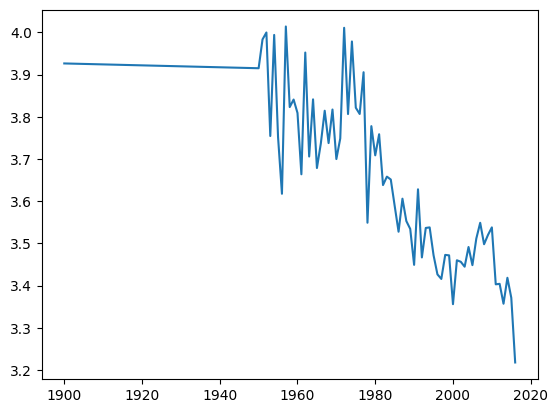

In [36]:
plt.plot(films_['year'], films_['avg_rating'])

Вообщем раньше лучше фильмы снимали по ходу.......